In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../brain tumor pro cnn DL/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../brain tumor pro cnn DL/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
from zipfile import ZipFile

data_path = 'brain.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')


The data set has been extracted.


In [5]:
path = 'Training'
classes = os.listdir(path)
classes


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [6]:
path = 'Testing'
classes = os.listdir(path)
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [7]:
X_train, Y_train=shuffle(X_train, Y_train, random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [13]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.2782 - loss: 3.3246 - val_accuracy: 0.2891 - val_loss: 1.3641
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.3205 - loss: 1.3387 - val_accuracy: 0.4728 - val_loss: 1.3167
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.5266 - loss: 1.0773 - val_accuracy: 0.5476 - val_loss: 1.0308
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.6002 - loss: 0.8983 - val_accuracy: 0.5884 - val_loss: 0.9174
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6883 - loss: 0.7468 - val_accuracy: 0.6973 - val_loss: 0.7021
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.6960 - loss: 0.6933 - val_accuracy: 0.6122 - val_loss: 0.8877
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7498 - loss: 0.6054 - val_accuracy: 0.6429 - val_loss: 0.7872
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7855 - loss: 0.5062 - val_accuracy: 0.6735 - v

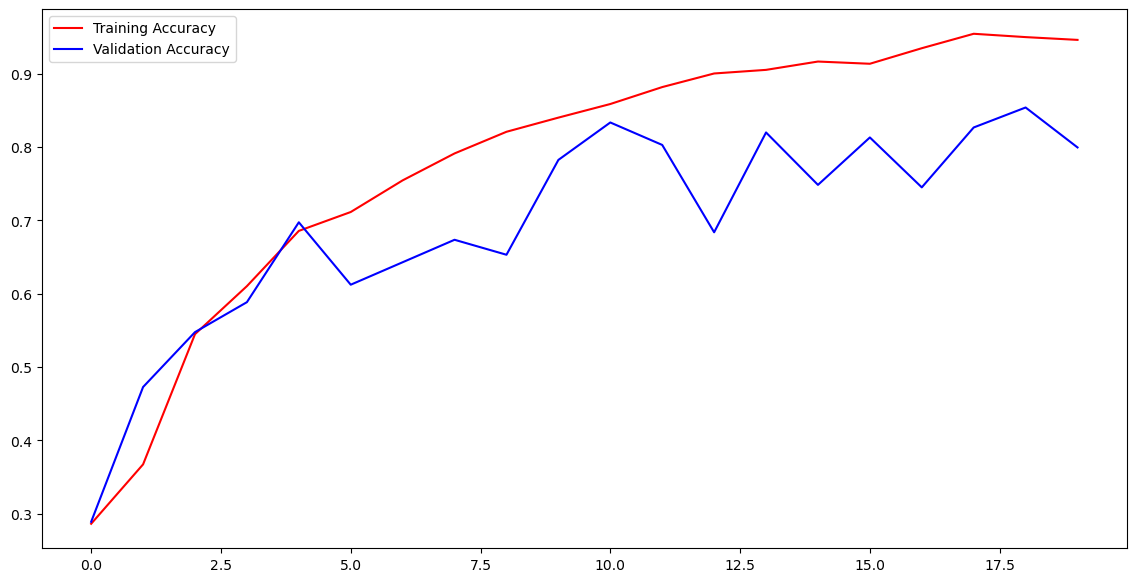

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

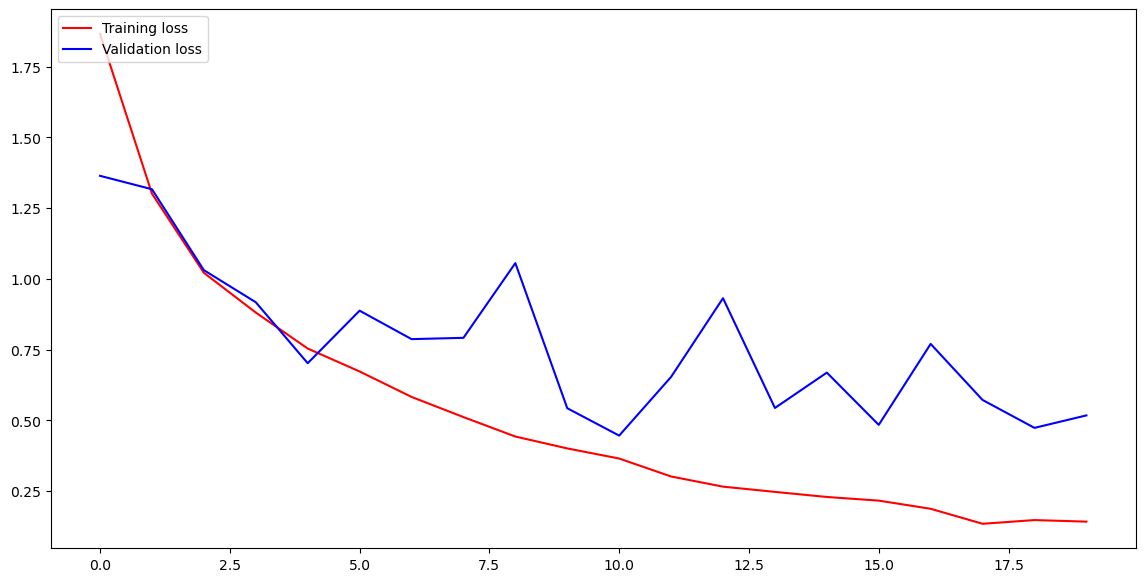

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [122]:
img = cv2.imread('../brain tumor pro cnn DL/Testing/glioma_tumor/image(64).jpg')

In [124]:
# if img is None:
#     print("Image not found or path is incorrect")
# else:
#     # Display the image
#     cv2.imshow('Image', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

In [126]:
# cv2.imshow('Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [128]:
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [131]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [133]:
# from tensorflow.keras.preprocessing import image
# img = image.load_img('../brain tumor pro cnn DL/Testing/pituitary_tumor/image(30).jpg')
# plt.imshow(img,interpolation='nearest')
# plt.show()

In [135]:
a=model.predict(img_array)
indices = a.argmax()
indices
if indices == 0:
    print("Glioma_tumor")
elif indices == 1:  # Use 'elif' instead of 'else if'
    print("Meningioma_tumor")
elif indices == 2:
    print("No_tumor")  # Fixed spelling of 'tumour' to 'tumor' for consistency
elif indices == 3:
    print("Pituitary_tumor")  # Fixed spelling
else:
    print("Couldn't Predict")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
glioma_tumor


In [ ]:
0 → glioma_tumor
1 → meningioma_tumor
2 → no_tumor
3 → pituitary_tumor